In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # pip install seaborn
import mplfinance as mpf # pip install mplfinance
import plotly.graph_objects as go #pip install pltly
import webbrowser

In [10]:
# Parametros de Descarga
ticker = "AMZN"
fecha_inicial = "2023-01-01"
fecha_final = "2024-01-01"

# Descargar Datos
datos = yf.download(ticker,start=fecha_inicial, end=fecha_final, interval="1d",multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [11]:
datos.head()

,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000
2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100
2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800
2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400
2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100


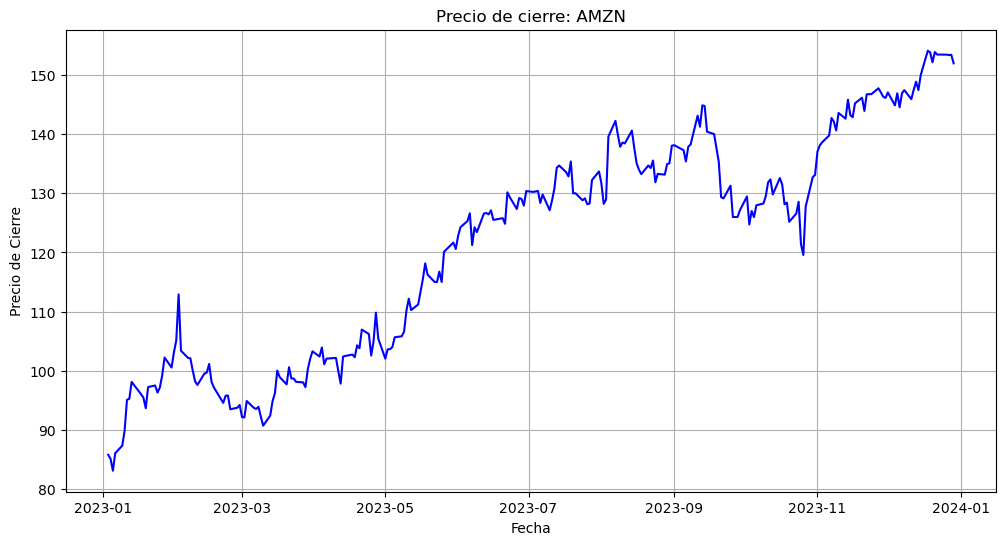

In [12]:
# Grafico 1: Precio de cierre usando maplotlib
plt.figure(figsize=(12,6))
plt.plot(datos.index, datos["Close"], label="Precios de Cierre", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Precio de cierre: "+ ticker)
plt.grid(True)
plt.show()


In [ ]:
# Grafico 2: Subplots para el Precio de Cierre, Bajo,  Alto, y Apertura
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22,12))

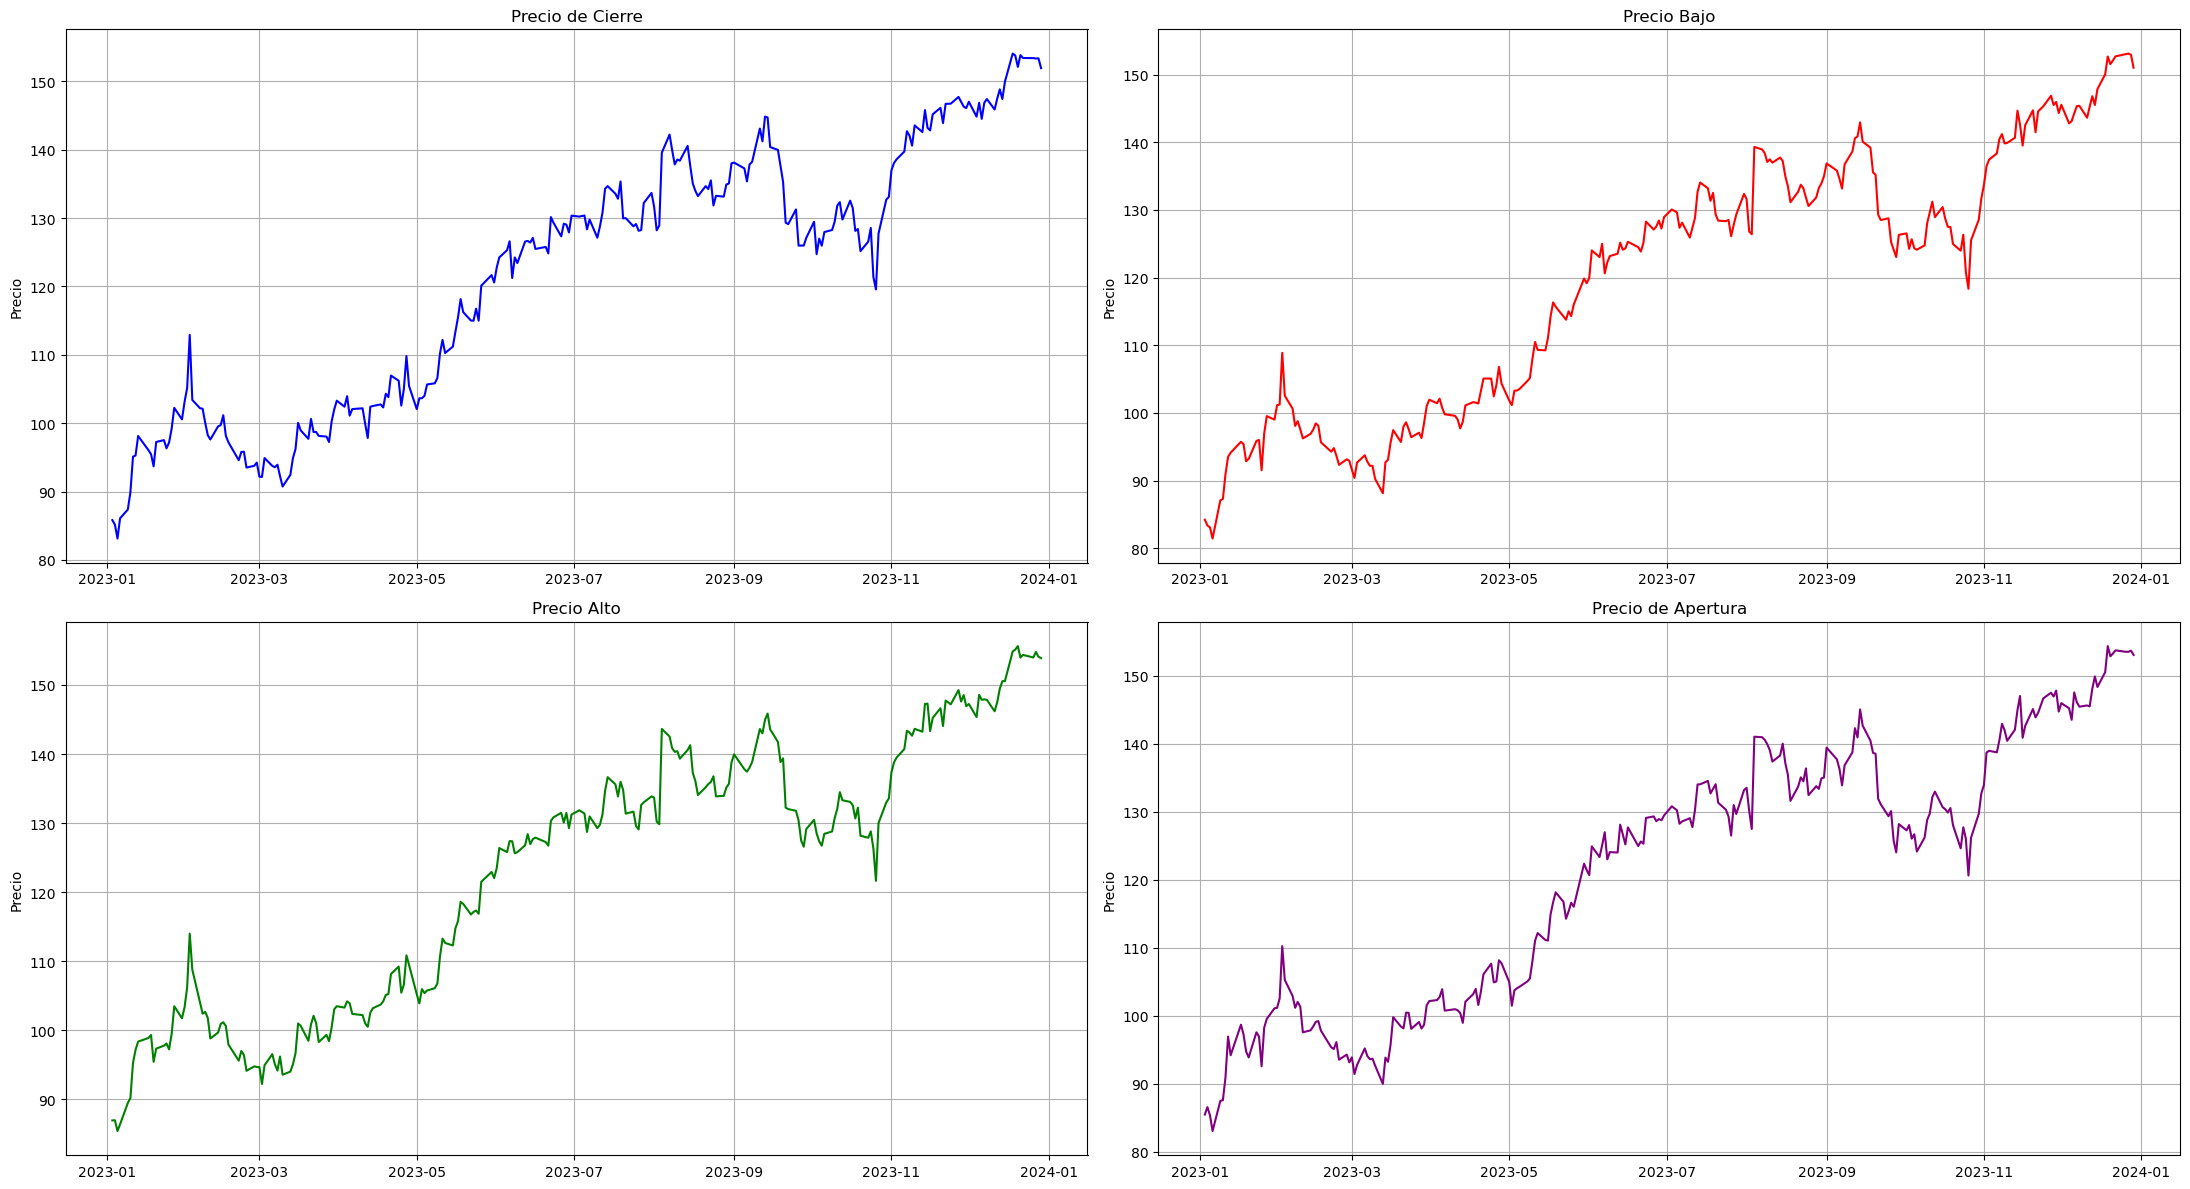

In [17]:
# Grafico 2: Subplots para el Precio de Cierre, Bajo,  Alto, y Apertura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22,12))

# Precios de Cierre
axes[0,0].plot(datos.index,datos["Close"], color="blue")
axes[0,0].set_title("Precio de Cierre")
axes[0,0].set_ylabel("Precio")
axes[0,0].grid()

# Precio Bajo
axes[0,1].plot(datos.index,datos["Low"], color="red")
axes[0,1].set_title("Precio Bajo")
axes[0,1].set_ylabel("Precio")
axes[0,1].grid()

# Precio Alto 
axes[1,0].plot(datos.index,datos["High"], color="green")
axes[1,0].set_title("Precio Alto")
axes[1,0].set_ylabel("Precio")
axes[1,0].grid()

# Precio De Apertura
axes[1,1].plot(datos.index,datos["Open"], color="purple")
axes[1,1].set_title("Precio de Apertura")
axes[1,1].set_ylabel("Precio")
axes[1,1].grid()

plt.tight_layout()
plt.show()

In [18]:
# Grafico 3: Rendimiento usando la ibreria de Seabor
datos["Rendimiento Simple"] = datos["Close"].pct_change()
datos.dropna(inplace=True)

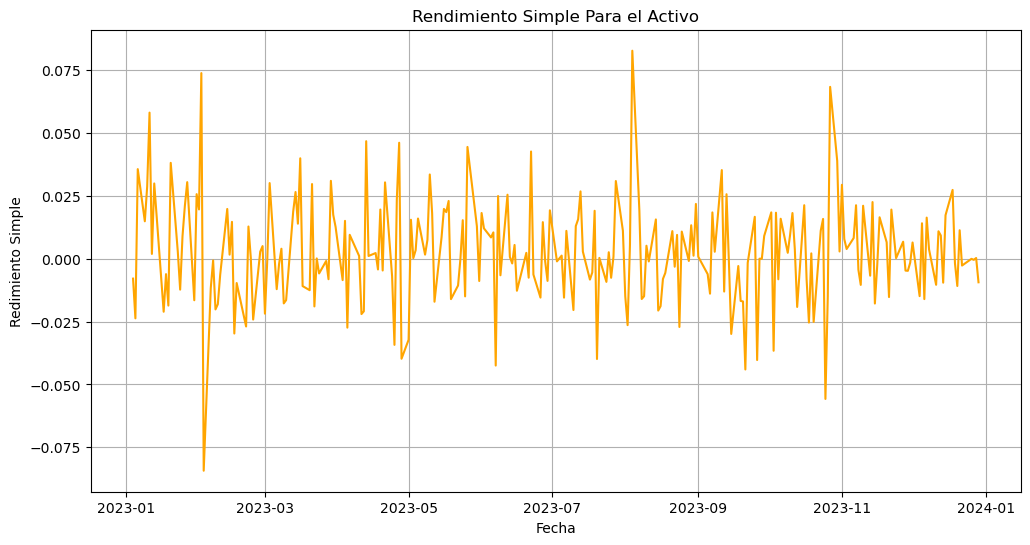

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x=datos.index, y=datos["Rendimiento Simple"], color="orange")
plt.xlabel("Fecha")
plt.ylabel("Redimiento Simple")
plt.title("Rendimiento Simple Para el Activo")
plt.grid("True")
plt.show()

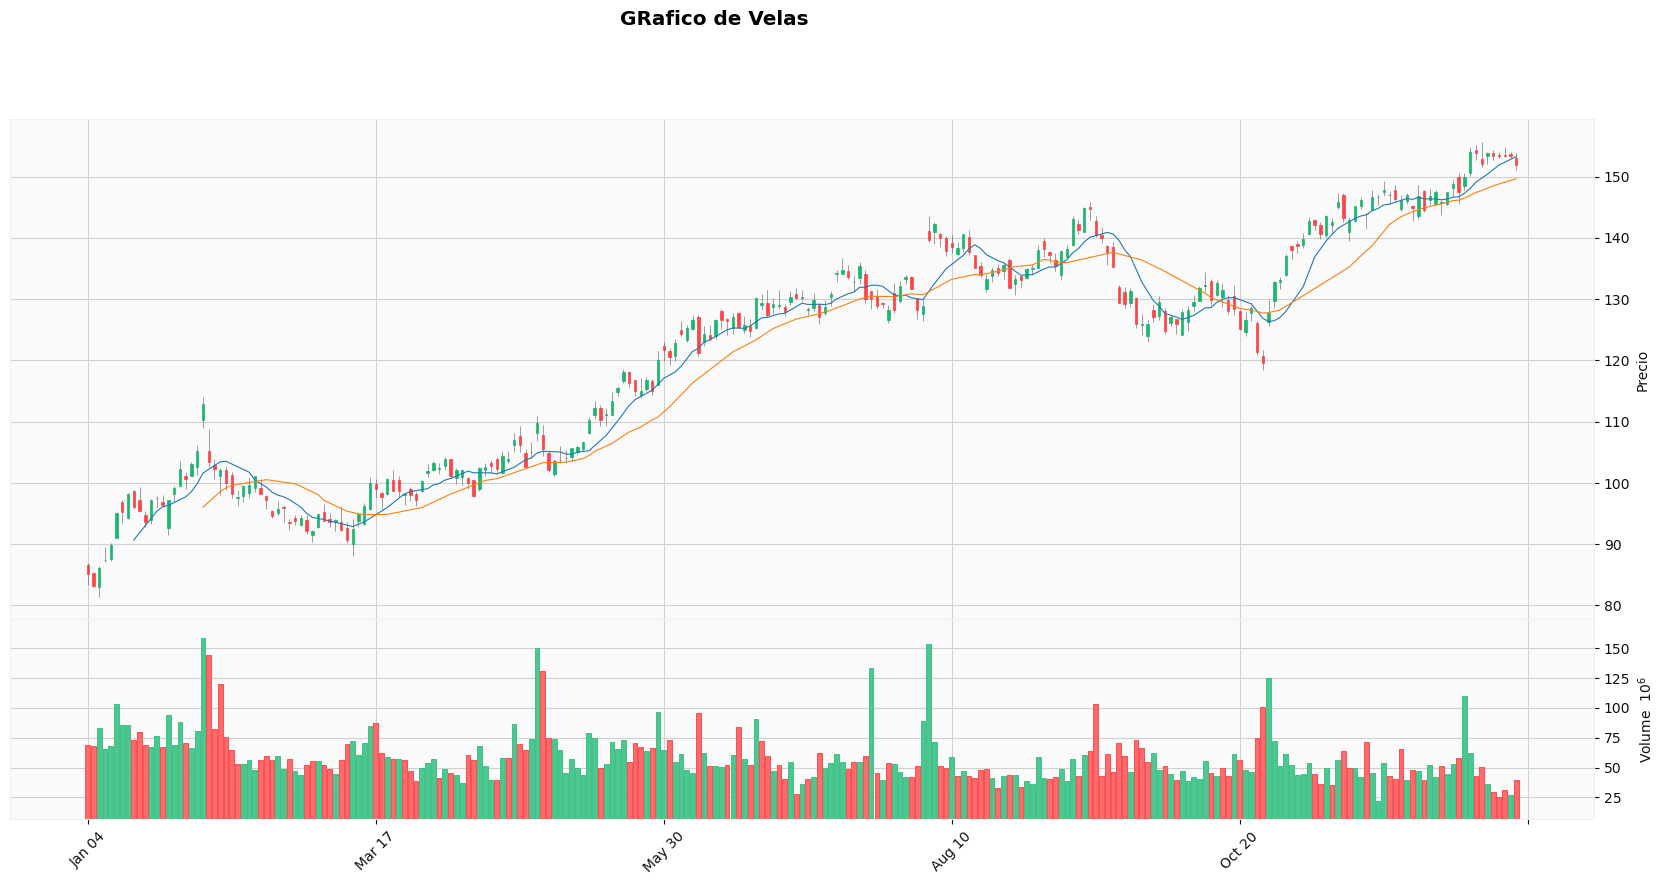

In [23]:
# Grafico 4: Grafico de velas usando mplfinance
# Mplfinance es de matplotlib enfocada hacia el sector financiero
mpf.plot(datos, type="candle", style="yahoo", title="GRafico de Velas", ylabel="Precio", volume=True, figsize=(22,10), 
         figscale=3.0, mav=(9,21))
plt.show()

In [ ]:
# Grafico 5: Grafio de velas utitlizando la libreria de Plotly
fig = go.Figure(data=[
    go.Candlestick(x=datos.index,
                   open=datos["Open"],
                   high=datos["High"],
                   low=datos['Low'],
                   close=datos["Close"])
])
fig.update_layout(
    title="Grafico de Velas con Plotly",
    xaxis_title="Fecha",
    yaxis_title="Precio",
    width=1500, # Ancho en pixeles
    height=700 # Altura en pixeles
)

# Guardar el grafico html en un archivo html
fig.write_html("grafico_velas_pltly.html")

# Opcional: Abrir automaticamente el plot en el navegador
webbrowser.open("grafico_velas_pltly.html")

True

In [ ]:
# Recordatorio:
#   - El uso de herramientas visuales nos ayuda a ver patrones y entender los datos de manera más clara y rápida.
